In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, normaltest, kstest, ttest_ind, mannwhitneyu, levene, ks_2samp
from pprint import pprint
from io import StringIO

# 1. Prediction task

1) Description: There is data on the cohort of users who perform a certain action in the application:

	day,share
	0,0.7123
	1,0.2279
	2,0.1883
	3,0.1758
	4,0.1598
	5,0.1559
	6,0.1459
	7,0.1373
	10,0.115
	14,0.1026
	17,0.0994
	21,0.0907
	24,0.0838
	28,0.0837

	You should:
	1.1) find the optimal approximating function for future values prediction and write down the formula for this function with optimized coefficients.
	1.2) visualize the initial data on the plot, as well as the values of the approximating function in the range from 0 to 120 days.



## Load data

In [26]:
data = StringIO(
    """day,share
0,0.7123
1,0.2279
2,0.1883
3,0.1758
4,0.1598
5,0.1559
6,0.1459
7,0.1373
10,0.115
14,0.1026
17,0.0994
21,0.0907
24,0.0838
28,0.0837
"""
)

df = pd.read_csv(data)
print(df)

    day   share
0     0  0.7123
1     1  0.2279
2     2  0.1883
3     3  0.1758
4     4  0.1598
5     5  0.1559
6     6  0.1459
7     7  0.1373
8    10  0.1150
9    14  0.1026
10   17  0.0994
11   21  0.0907
12   24  0.0838
13   28  0.0837


## Visualize data

<Axes: xlabel='day'>

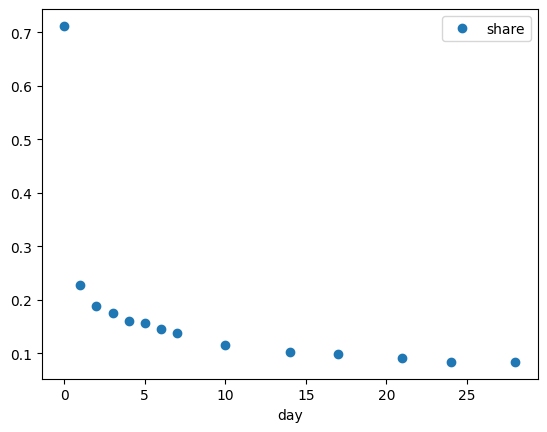

In [27]:
df.plot(x='day', y='share', style='o')

## Approximate

Optimized parameters: a = 0.7122671871767343, b = 0.5109276472055709, c = 0.19410520395827074


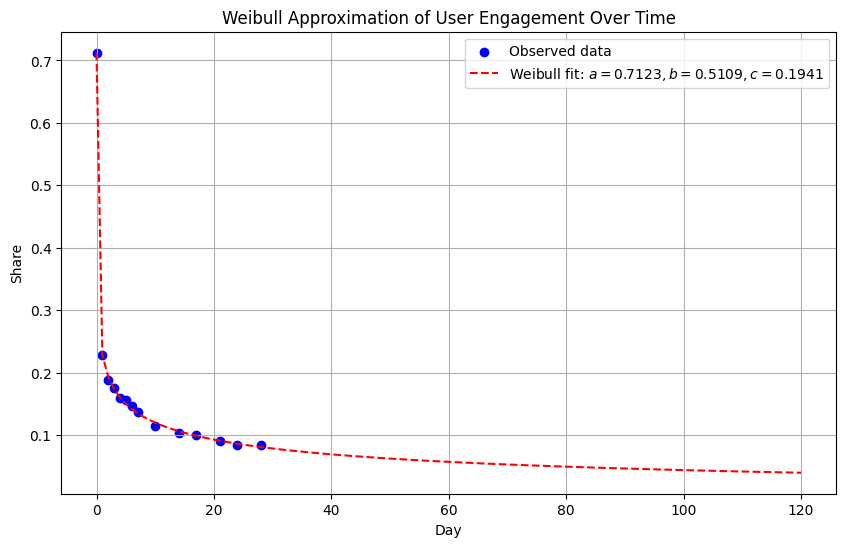

In [28]:
def weibull(x, a, b, c):
    return a * np.exp(-(x / b) ** c)

# Curve fitting to find optimal parameters
x_data = df['day']
y_data = df['share']
popt, _ = curve_fit(weibull, x_data, y_data, p0=[0.7, 10, 1])

# Optimal parameters
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}")

# Generate predictions for the range 0 to 120 days
x_pred = np.arange(0, 121)
y_pred = weibull(x_pred, a_opt, b_opt, c_opt)

# Plot initial data and the Weibull approximation
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Observed data')
plt.plot(x_pred, y_pred, color='red', linestyle='--', label=f'Weibull fit: $a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}$')
plt.xlabel('Day')
plt.ylabel('Share')
plt.title('Weibull Approximation of User Engagement Over Time')
plt.legend()
plt.grid()
plt.show()


### Weibull Distribution with Parameters

Incorporating the specific parameters, the Weibull function can be represented as:

\
f(x; 0.7123, 0.5109) = \begin{cases}
    \frac{0.5109}{0.7123} \left(\frac{x}{0.7123}\right)^{0.5109-1} e^{-\left(\frac{x}{0.7123}\right)^{0.5109}}, & x \geq 0 \\
    0, & x < 0
\end{cases}
\`


# 2. Probability theory task

Description: There are 5 dices in the pot (4-sided, 6-sided, 8-sided, 12-sided, 20-sided). The player randomly selected a dice, tossed it and the value 5 shown on it. It is necessary to determine the probability for each of the 5 dices that it was chosen.


### Python solution version

In [29]:
# Step 1: Define the dice and prior probabilities
dice_types = ['D4', 'D6', 'D8', 'D12', 'D20']
prior_probability = 1 / len(dice_types)  # Equal probability for each dice
# Step 2: Calculate likelihoods of rolling a 5 for each dice
likelihoods = {
    'D4': 0,                  # Impossible to roll a 5
    'D6': 1/6,                # 1 way to roll a 5 out of 6
    'D8': 1/8,                # 1 way to roll a 5 out of 8
    'D12': 1/12,              # 1 way to roll a 5 out of 12
    'D20': 1/20               # 1 way to roll a 5 out of 20
}
# Step 3: Total probability of rolling a 5
total_probability = sum(likelihoods[dice] * prior_probability for dice in dice_types)
# Step 4: Apply Bayes' Theorem
posterior_probabilities = {dice: (likelihoods[dice] * prior_probability) / total_probability for dice in dice_types}

In [30]:
# Summary of probabilities
for dice, probability in posterior_probabilities.items():
    print(f"P({dice} | roll = 5) = {probability:.3f}")


P(D4 | roll = 5) = 0.000
P(D6 | roll = 5) = 0.392
P(D8 | roll = 5) = 0.294
P(D12 | roll = 5) = 0.196
P(D20 | roll = 5) = 0.118


### Mathematical Formulation of the Solution

To solve the problem, we need to calculate the probability that each dice was chosen, given that the outcome of the roll is 5.

#### 1. Define the Dice Types and Prior Probability
Let's denote i-sided dice as $D_i$ and the probability or each dice given that the outcome of the roll is 5, denoted as $P(D_i∣\text{roll}=5)$
for each dice 
$D_i$.

Assume each dice has an equal probability of being chosen:
$P(D_i) = \frac{1}{5}$ for each $D_i$.

####  2. Calculate the Likelihood of Rolling a 5 with Each Dice
1. **For D4**: Impossible to roll a 5.  
   $ P(\text{roll} = 5 | D_4) = 0 $

2. **For D6**: 1 way to roll a 5 out of 6 possible outcomes.  
   $ P(\text{roll} = 5 | D_6) = \frac{1}{6} $

3. **For D8**: 1 way to roll a 5 out of 8 possible outcomes.  
   $ P(\text{roll} = 5 | D_8) = \frac{1}{8} $

4. **For D12**: 1 way to roll a 5 out of 12 possible outcomes.  
   $ P(\text{roll} = 5 | D_{12}) = \frac{1}{12} $

5. **For D20**: 1 way to roll a 5 out of 20 possible outcomes.  
   $ P(\text{roll} = 5 | D_{20}) = \frac{1}{20} $

#### 3. Total Probability of Rolling a 5
Using the law of total probability:
$$
P(\text{roll} = 5) = \sum_{i=1}^{5} P(\text{roll} = 5 | D_i) \cdot P(D_i)
$$

Calculating each term:
1. For D4: $$ \frac{1}{5} \cdot 0 = 0 $$
2. For D6: $$ \frac{1}{5} \cdot \frac{1}{6} = \frac{1}{30} $$
3. For D8: $$ \frac{1}{5} \cdot \frac{1}{8} = \frac{1}{40} $$
4. For D12: $$ \frac{1}{5} \cdot \frac{1}{12} = \frac{1}{60} $$
5. For D20: $$ \frac{1}{5} \cdot \frac{1}{20} = \frac{1}{100} $$

Now, summing these:
$$
P(\text{roll} = 5) = 0 + \frac{1}{30} + \frac{1}{40} + \frac{1}{60} + \frac{1}{100}
$$

Finding a common denominator:
$$
P(\text{roll} = 5) = \frac{20}{600} + \frac{15}{600} + \frac{10}{600} + \frac{6}{600} = \frac{51}{600} = \frac{17}{200}
$$

#### 4. Apply Bayes' Theorem
Using Bayes' theorem:
$$
P(D_i | \text{roll} = 5) = \frac{P(\text{roll} = 5 | D_i) \cdot P(D_i)}{P(\text{roll} = 5)}
$$

#### 5. Calculate Posterior Probabilities
Now, for each dice $D_i$:

1. **For D4**:
   $$
   P(D4 | \text{roll} = 5) = \frac{0}{\frac{17}{200}} = 0
   $$

2. **For D6**:
   $$
   P(D6 | \text{roll} = 5) = \frac{\frac{1}{30}}{\frac{17}{200}} = \frac{200}{30 \cdot 17} = \frac{20}{51} \approx 0.392
   $$

3. **For D8**:
   $$
   P(D8 | \text{roll} = 5) = \frac{\frac{1}{40}}{\frac{17}{200}} = \frac{200}{40 \cdot 17} = \frac{10}{34} \approx 0.294
   $$

4. **For D12**:
   $$
   P(D12 | \text{roll} = 5) = \frac{\frac{1}{60}}{\frac{17}{200}} = \frac{200}{60 \cdot 17} = \frac{10}{51} \approx 0.196
   $$

5. **For D20**:
   $$
   P(D20 | \text{roll} = 5) = \frac{\frac{1}{100}}{\frac{17}{200}} = \frac{200}{100 \cdot 17} = \frac{2}{17} \approx 0.118
   $$

#### Summary of Probabilities
Thus, the probabilities for each dice given that the roll was a 5 are approximately:

- **$ P(D4 | \text{roll} = 5) = 0 $**
- **$ P(D6 | \text{roll} = 5) \approx 0.392 $**
- **$ P(D8 | \text{roll} = 5) \approx 0.294 $**
- **$ P(D12 | \text{roll} = 5) \approx 0.196 $**
- **$ P(D20 | \text{roll} = 5) \approx 0.118 $**



# 3. The analyzing task of the results of the A/B test.


Description:
The results of the A/B test are saved in the file "experiment_data.csv". It is necessary to analyze whether there is a statistically significant difference in the analyzed metric between the two variants.
You should:
1) to justify the chosen method of the analysis;
2) demonstrate the Python code for the analysis (for example in Jupyter Notebook, etc.); 
3) explain the results of the analysis

In [31]:
# Assumptions: 
# 1) data was gathered correctly, samples are independent, data was cleaned and so on
# 2) default treshholds on p-value could be used 

### 1. Explore the data

In [32]:
file_path = 'experiment_data.csv'
experiment_data = pd.read_csv(file_path, index_col=0)

experiment_data.head()

,variant,value
0,variant_a,0.2683
1,variant_a,0.1852
2,variant_a,0.0711
3,variant_a,0.0018
4,variant_a,0.1054


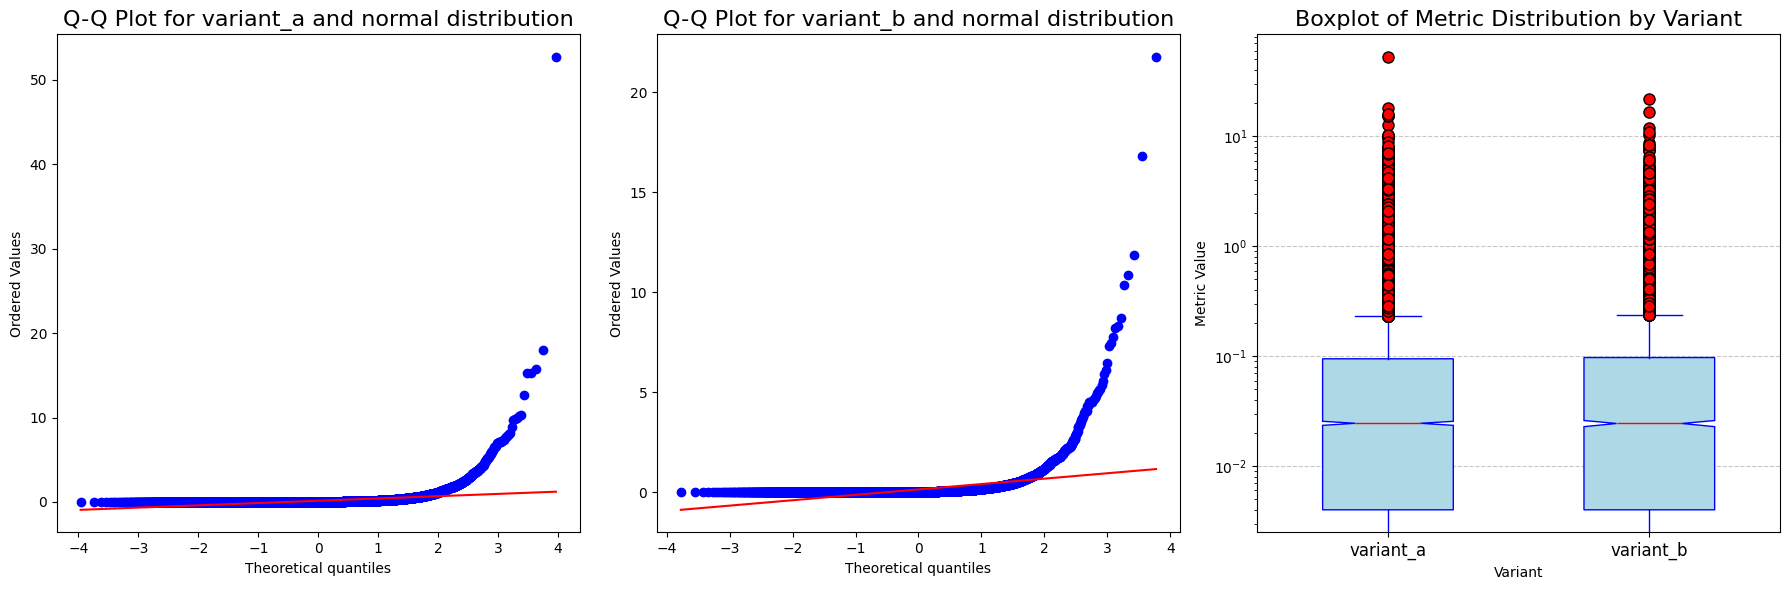

In [33]:
variant_a = experiment_data[experiment_data['variant'] == 'variant_a']['value']
variant_b = experiment_data[experiment_data['variant'] == 'variant_b']['value']

# Plot Q-Q plots to check for normality in each group
plt.figure(figsize=(18, 6))

# Q-Q plot for variant_a
plt.subplot(1, 3, 1)
stats.probplot(variant_a, dist="norm", plot=plt)
plt.title("Q-Q Plot for variant_a and normal distribution", fontsize=16)

# Q-Q plot for variant_b
plt.subplot(1, 3, 2)
stats.probplot(variant_b, dist="norm", plot=plt)
plt.title("Q-Q Plot for variant_b and normal distribution", fontsize=16)

# Plot side-by-side boxplots for distribution comparison
plt.subplot(1, 3, 3)
data_to_plot = [experiment_data.loc[experiment_data['variant'] == variant, 'value'] for variant in experiment_data['variant'].unique()]

# Create the boxplot
plt.boxplot(data_to_plot, 
            widths=0.5,
            notch=True,  # Enable notches for median
            patch_artist=True,  # Fill the boxes with color
            medianprops=dict(color='red'),  # Customize median line color
            whiskerprops=dict(color='blue'),  # Customize whisker color
            capprops=dict(color='blue'),  # Customize cap color
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8),  # Customize outliers
            boxprops=dict(facecolor='lightblue', color='blue'))  # Customize box color

# Set the x-axis tick labels
plt.xticks(range(1, len(experiment_data['variant'].unique()) + 1), experiment_data['variant'].unique(), fontsize=12)

# Add titles and labels
plt.title('Boxplot of Metric Distribution by Variant', fontsize=16) #, fontweight='bold')
plt.xlabel('Variant')
plt.ylabel('Metric Value')
plt.yscale('log')
# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
experiment_data.groupby('variant').describe().unstack(1)

              variant  
value  count  variant_a    18731.000000
              variant_b     8661.000000
       mean   variant_a        0.147163
              variant_b        0.148885
       std    variant_a        0.660557
              variant_b        0.574914
       min    variant_a        0.000000
              variant_b        0.000000
       25%    variant_a        0.004000
              variant_b        0.004000
       50%    variant_a        0.024500
              variant_b        0.024400
       75%    variant_a        0.094600
              variant_b        0.097100
       max    variant_a       52.672400
              variant_b       21.754500
dtype: float64

Important notes based on data overview:
 - data not look like normal distributed (q-q plots not follow straight line)
 - group A and group B have different sizes

## 2. Choosing the Method for Analysis

### 1. If the data is normally distributed and variances of the two groups are equal:
   - Use a **two-sample t-test** to check if there is a statistically significant difference in the metric between `variant_a` and `variant_b`.
   
   - **Normality Tests**: Choose the test based on sample size:
     - **Shapiro-Wilk test** for small samples (n < 30)
     - **D'Agostino test** for medium samples (30 ≤ n < 5000)
     - **Kolmogorov-Smirnov test** for large samples (n ≥ 5000)

   - **Variance Equality Test**:
     - Use **Levene’s test** to check if the variances of the two groups are equal.

### 2. If normality and/or equality of variance assumptions are not met:
   - Use the **Mann-Whitney U test**, a robust non-parametric alternative, to evaluate if there is a significant difference between the two groups.


Additionally, apply a **two-sample Kolmogorov-Smirnov (K-S) test**:
     - This non-parametric test provides further insight into differences between the distributions of the two groups.
     - If both the Mann-Whitney U test and the K-S test show significant differences, it strengthens the conclusion that a meaningful difference exists between the groups.
     - If one test shows significance while the other does not, this suggests further investigation into the data distribution and the specific nature of differences between the groups.


Let's proceed with a normality check and variance check, then apply the appropriate test

In [35]:
alpha = 0.05


def check_normality(data, group_name):
    n = len(data)
    if n < 30:
        # Use the Shapiro-Wilk test for small samples
        stat, p_value = shapiro(data)
        return p_value, "Shapiro-Wilk", n
    elif 30 <= n < 5000:
        # Use the D'Agostino test for medium samples
        stat, p_value = normaltest(data)
        return p_value, "D'Agostino", n
    else:
        # Use the Kolmogorov-Smirnov test for large samples
        mean = np.mean(data)
        std_dev = np.std(data)
        stat, p_value = kstest(data, 'norm', args=(mean, std_dev))
        return p_value, "Kolmogorov-Smirnov", n

normality_a_pvalue, normality_a_test, sample_size_a = check_normality(variant_a, "Group A")
normality_b_pvalue, normality_b_test, sample_size_b = check_normality(variant_b, "Group B")

variance_test = levene(variant_a, variant_b)

# Compare means with t-test in case of data normality and variance equality and compare medians with U test otherwise
if normality_a_pvalue > alpha and normality_b_pvalue > alpha and variance_test.pvalue > alpha:
    test_stat, p_value = ttest_ind(variant_a, variant_b, equal_var=True)
    test_type = "Two-sample t-test"
else:
    test_stat, p_value = mannwhitneyu(variant_a, variant_b, alternative='two-sided')
    test_type = "Mann-Whitney U test"

# Kolmogorov-Smirnov Test to compare distributions
ks_statistic, ks_p_value = ks_2samp(variant_a, variant_b)

# Display the results
results = {
    "Normality Tests": {
        "Group A": {
            "p-value": normality_a_pvalue,
            "Test": normality_a_test,
            "sample_size": sample_size_a
        },
        "Group B": {
            "p-value": normality_b_pvalue,
            "Test": normality_b_test,
            "sample_size": sample_size_b
        }
    },
    "Variance Test p-value": variance_test.pvalue,
    "Statistical Test": {
        "Type": test_type,
        "Test Statistic": test_stat,
        "p-value": p_value
    },
    "Kolmogorov-Smirnov Test": {
        "Statistic": ks_statistic,
        "p-value": ks_p_value,
       # "Result": ks_result
    }
}

# Print results in a structured format
pprint(results)


{'Kolmogorov-Smirnov Test': {'Statistic': np.float64(0.008760408599954084),
                             'p-value': np.float64(0.7501411333391004)},
 'Normality Tests': {'Group A': {'Test': 'Kolmogorov-Smirnov',
                                 'p-value': np.float64(0.0),
                                 'sample_size': 18731},
                     'Group B': {'Test': 'Kolmogorov-Smirnov',
                                 'p-value': np.float64(0.0),
                                 'sample_size': 8661}},
 'Statistical Test': {'Test Statistic': np.float64(80811919.5),
                      'Type': 'Mann-Whitney U test',
                      'p-value': np.float64(0.6187476899771387)},
 'Variance Test p-value': np.float64(0.8417652793950428)}


### Analysis Overview

#### Interpretation of Results

**Normality Tests:**
- **Group A:** The null hypothesis of normality is rejected (p-value = 0.0000). The data may not be normally distributed.
- **Group B:** The null hypothesis of normality is rejected (p-value = 0.0000). The data may not be normally distributed.

**Variance Test:**
- The null hypothesis of equal variances is not rejected (p-value = 0.8418). The variances are likely equal.

**Mann-Whitney U test:**
- The null hypothesis that the distributions of the two groups are equal is not rejected (p-value = 0.6187). There is no significant difference in medians.

**Kolmogorov-Smirnov Test:**
- The null hypothesis that the two samples come from the same distribution is not rejected (p-value = 0.7501). The distributions are likely the same.

### Conclusion:
No statistically significant difference in the analyzed metric between the two variants was fould. This means that any changes, if present, are not substantial enough to confidently conclude that they are caused by changes in the experiment rather than random fluctuations in the data.
